### 🔑 Authenticate & Download Data

In [ ]:
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d phucthaiv02/butterfly-image-classification
!unzip -o butterfly-image-classification.zip -d /content/butterfly_data

Streaming output truncated to the last 5000 lines.
  inflating: /content/butterfly_data/train/Image_2348.jpg  
  inflating: /content/butterfly_data/train/Image_2349.jpg  
  inflating: /content/butterfly_data/train/Image_235.jpg  
  inflating: /content/butterfly_data/train/Image_2350.jpg  
  inflating: /content/butterfly_data/train/Image_2351.jpg  
  inflating: /content/butterfly_data/train/Image_2352.jpg  
  inflating: /content/butterfly_data/train/Image_2353.jpg  
  inflating: /content/butterfly_data/train/Image_2354.jpg  
  inflating: /content/butterfly_data/train/Image_2355.jpg  
  inflating: /content/butterfly_data/train/Image_2356.jpg  
  inflating: /content/butterfly_data/train/Image_2357.jpg  
  inflating: /content/butterfly_data/train/Image_2358.jpg  
  inflating: /content/butterfly_data/train/Image_2359.jpg  
  inflating: /content/butterfly_data/train/Image_236.jpg  
  inflating: /content/butterfly_data/train/Image_2360.jpg  
  inflating: /content/butterfly_data/train/Image_23

## 🏗️ Build & Evaluate the SVM Model

Top 10 most frequent classes: ['MOURNING CLOAK', 'SLEEPY ORANGE', 'ATALA', 'BROWN SIPROETA', 'SCARCE SWALLOW', 'CRECENT', 'BANDED ORANGE HELICONIAN', 'MILBERTS TORTOISESHELL', 'RED CRACKER', 'ORANGE TIP']
PCA reduced feature dimensions from 150528 to 200

=== Training SVM with kernel: linear ===

— Validation Metrics (linear kernel) —
Accuracy: 0.6557
Precision (weighted): 0.6501
Recall (weighted): 0.6557
F1 Score (weighted): 0.6474

Classification Report:
                          precision    recall  f1-score   support

          MOURNING CLOAK       0.72      0.79      0.76        39
           SLEEPY ORANGE       0.76      0.88      0.81        32
                   ATALA       0.50      0.63      0.56        30
          BROWN SIPROETA       0.48      0.43      0.46        30
          SCARCE SWALLOW       0.75      0.83      0.79        29
                 CRECENT       0.67      0.69      0.68        29
BANDED ORANGE HELICONIAN       0.69      0.62      0.65        29
  MILBERTS

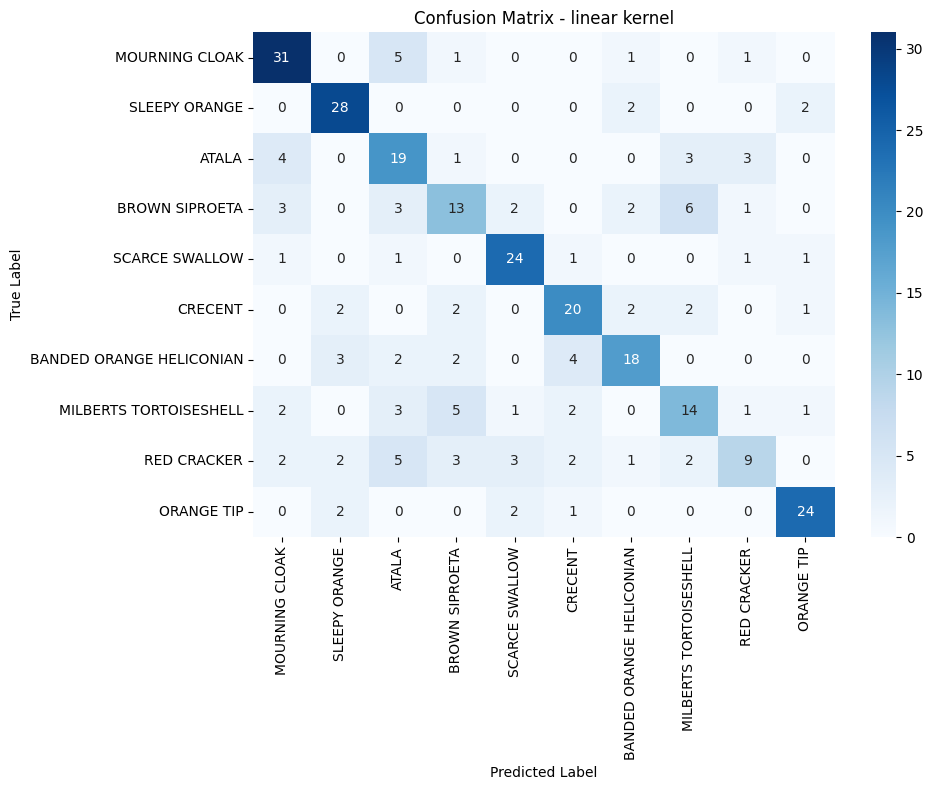


=== Training SVM with kernel: rbf ===

— Validation Metrics (rbf kernel) —
Accuracy: 0.6820
Precision (weighted): 0.6855
Recall (weighted): 0.6820
F1 Score (weighted): 0.6748

Classification Report:
                          precision    recall  f1-score   support

          MOURNING CLOAK       0.82      0.85      0.84        39
           SLEEPY ORANGE       0.73      0.84      0.78        32
                   ATALA       0.57      0.80      0.67        30
          BROWN SIPROETA       0.52      0.40      0.45        30
          SCARCE SWALLOW       0.81      0.76      0.79        29
                 CRECENT       0.56      0.76      0.65        29
BANDED ORANGE HELICONIAN       0.61      0.48      0.54        29
  MILBERTS TORTOISESHELL       0.64      0.62      0.63        29
             RED CRACKER       0.71      0.41      0.52        29
              ORANGE TIP       0.83      0.83      0.83        29

                accuracy                           0.68       305
      

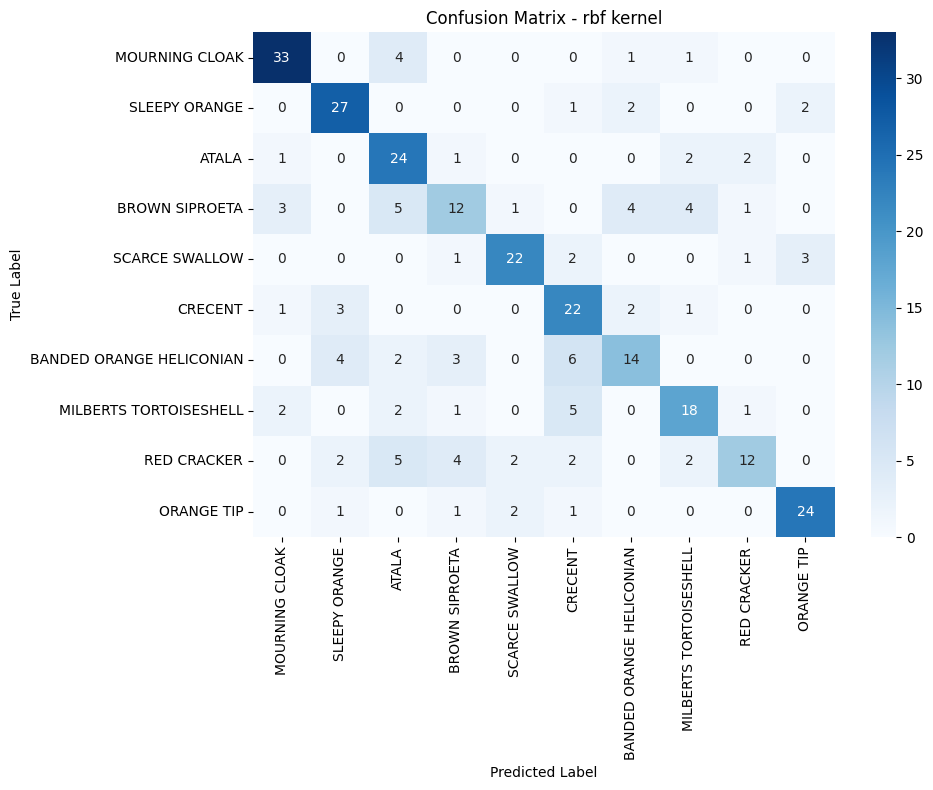


=== Training SVM with kernel: poly ===

— Validation Metrics (poly kernel) —
Accuracy: 0.5246
Precision (weighted): 0.6828
Recall (weighted): 0.5246
F1 Score (weighted): 0.5331

Classification Report:
                          precision    recall  f1-score   support

          MOURNING CLOAK       0.81      0.56      0.67        39
           SLEEPY ORANGE       0.71      0.78      0.75        32
                   ATALA       0.61      0.73      0.67        30
          BROWN SIPROETA       0.67      0.20      0.31        30
          SCARCE SWALLOW       0.83      0.52      0.64        29
                 CRECENT       0.22      0.86      0.35        29
BANDED ORANGE HELICONIAN       0.83      0.34      0.49        29
  MILBERTS TORTOISESHELL       0.38      0.31      0.34        29
             RED CRACKER       0.80      0.14      0.24        29
              ORANGE TIP       0.92      0.76      0.83        29

                accuracy                           0.52       305
    

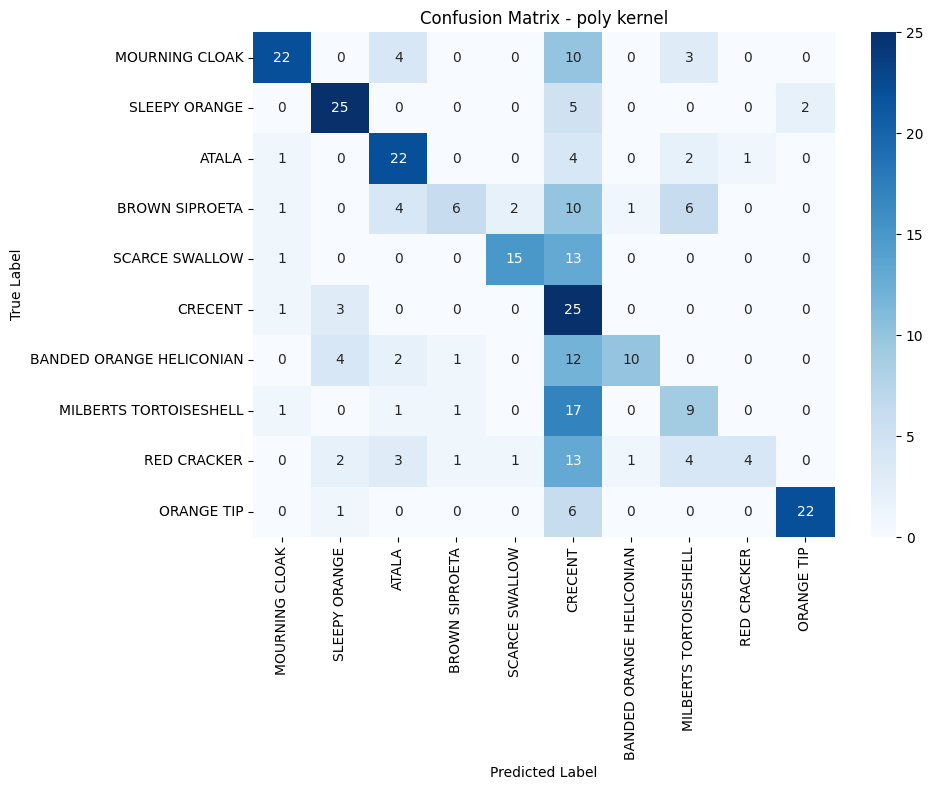


=== Training SVM with kernel: sigmoid ===

— Validation Metrics (sigmoid kernel) —
Accuracy: 0.5344
Precision (weighted): 0.5461
Recall (weighted): 0.5344
F1 Score (weighted): 0.5330

Classification Report:
                          precision    recall  f1-score   support

          MOURNING CLOAK       0.74      0.82      0.78        39
           SLEEPY ORANGE       0.62      0.66      0.64        32
                   ATALA       0.42      0.53      0.47        30
          BROWN SIPROETA       0.41      0.37      0.39        30
          SCARCE SWALLOW       0.83      0.66      0.73        29
                 CRECENT       0.34      0.41      0.38        29
BANDED ORANGE HELICONIAN       0.78      0.48      0.60        29
  MILBERTS TORTOISESHELL       0.35      0.41      0.38        29
             RED CRACKER       0.32      0.21      0.25        29
              ORANGE TIP       0.59      0.69      0.63        29

                accuracy                           0.53       30

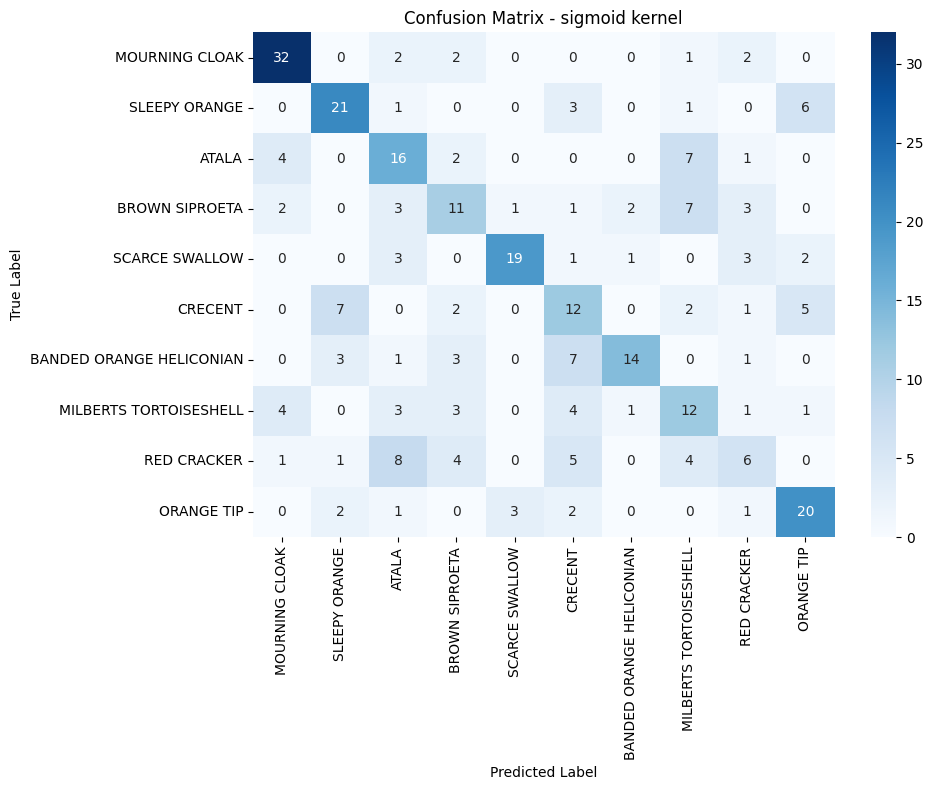


Best kernel based on F1 Score: rbf

— Final Test Predictions with Best SVM Kernel —
      filename         predicted_label
0  Image_1.jpg          SCARCE SWALLOW
1  Image_2.jpg                   ATALA
2  Image_3.jpg          SCARCE SWALLOW
3  Image_4.jpg                   ATALA
4  Image_5.jpg  MILBERTS TORTOISESHELL


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from tensorflow.keras.preprocessing.image import load_img, img_to_array

# 1. Paths
TRAIN_DIR = '/content/butterfly_data/train'
TEST_DIR = '/content/butterfly_data/test'
TRAIN_CSV = '/content/butterfly_data/Training_set.csv'
TEST_CSV = '/content/butterfly_data/Testing_set.csv'

# 2. Load CSVs
train_df = pd.read_csv(TRAIN_CSV)
test_df = pd.read_csv(TEST_CSV)
train_df.columns = train_df.columns.str.strip().str.lower()
test_df.columns = test_df.columns.str.strip().str.lower()

if 'filename' not in train_df.columns or 'label' not in train_df.columns:
    raise ValueError("Training CSV must contain 'filename' and 'label' columns.")

# 3. Filter top 10 classes
top_classes = train_df['label'].value_counts().head(10).index.tolist()
print("Top 10 most frequent classes:", top_classes)
train_df = train_df[train_df['label'].isin(top_classes)].reset_index(drop=True)

# 4. Load and preprocess images
def load_images(df, folder, classes, size=(224, 224)):
    X, y = [], []
    for _, row in df.iterrows():
        img_path = os.path.join(folder, row['filename'])
        try:
            img = load_img(img_path, target_size=size)
            arr = img_to_array(img) / 255.0
            X.append(arr.flatten())
            y.append(classes.index(row['label']))
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(X), np.array(y)

# Training set
X_train, y_train = load_images(train_df, TRAIN_DIR, top_classes)

# 5. Train-test split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_train, y_train, test_size=0.3, stratify=y_train, random_state=42
)

# 6. Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_test_scaled = scaler.transform(X_test_split)

# 7. Apply PCA
pca = PCA(n_components=200)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced feature dimensions from {X_train.shape[1]} to {X_train_pca.shape[1]}")

# 8. Try all SVM kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
results = {}

for kernel in kernels:
    print(f"\n=== Training SVM with kernel: {kernel} ===")
    svm_model = SVC(kernel=kernel, C=10, gamma='scale')
    svm_model.fit(X_train_pca, y_train_split)

    y_pred = svm_model.predict(X_test_pca)

    acc = accuracy_score(y_test_split, y_pred)
    prec = precision_score(y_test_split, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test_split, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test_split, y_pred, average='weighted', zero_division=0)

    print(f"\n— Validation Metrics ({kernel} kernel) —")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (weighted): {prec:.4f}")
    print(f"Recall (weighted): {rec:.4f}")
    print(f"F1 Score (weighted): {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test_split, y_pred, target_names=top_classes))

    cm = confusion_matrix(y_test_split, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=top_classes, yticklabels=top_classes)
    plt.title(f'Confusion Matrix - {kernel} kernel')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    results[kernel] = {'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1}

# 9. Final test prediction using best kernel (e.g., 'rbf')
best_kernel = max(results, key=lambda k: results[k]['f1'])
print(f"\nBest kernel based on F1 Score: {best_kernel}")

final_model = SVC(kernel=best_kernel, C=10, gamma='scale')
final_model.fit(X_train_pca, y_train_split)

# Process test images
def load_test_images(df, folder, size=(224, 224)):
    X = []
    for _, row in df.iterrows():
        img_path = os.path.join(folder, row['filename'])
        try:
            img = load_img(img_path, target_size=size)
            arr = img_to_array(img) / 255.0
            X.append(arr.flatten())
        except Exception as e:
            print(f"Error loading {img_path}: {e}")
    return np.array(X)

X_final_test = load_test_images(test_df, TEST_DIR)

# Standardize and apply PCA to test data
X_final_test_scaled = scaler.transform(X_final_test)
X_final_test_pca = pca.transform(X_final_test_scaled)

# Final predictions
y_pred_final_test = final_model.predict(X_final_test_pca)
test_df['predicted_label'] = [top_classes[i] for i in y_pred_final_test]
test_df.to_csv('/content/test_with_predictions_best_svm.csv', index=False)

print("\n— Final Test Predictions with Best SVM Kernel —")
print(test_df[['filename', 'predicted_label']].head())
